In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import gp

In [2]:
def multivariate_normal(n: int = 1000):
    mean=np.array([0,0])
    cov = np.array([[1, 0.5], [0.5, 1.75]])
    X = np.random.multivariate_normal(mean=mean, cov=cov, size=n)

    mins = X.min(axis=0)
    maxs = X.max(axis=0)
    mins -= 0.1
    maxs += 0.1

    x = np.linspace(mins[0], maxs[0], 100)
    y = np.linspace(mins[1], maxs[1], 100)
    xx, yy = np.meshgrid(x, y)

    mean_hat = X.mean(axis=0)
    cov_hat = np.cov(X.T)

    dim = X.shape[1]
    def kernel(x):
        func = lambda x: np.exp(-0.5 * (x-mean_hat).T@np.linalg.inv(cov_hat)@(x-mean_hat)) / (np.sqrt((2*np.pi)**dim * np.linalg.det(cov_hat)))
        return np.array([func(t) for t in x])


    # # kernel = scipy.stats.gaussian_kde(X.T, bw_method="scott")
    xy = np.vstack([xx.ravel(), yy.ravel()])
    densities = kernel(xy.T).reshape(xx.shape)
    # plt.scatter(X[:, 0], X[:, 1])
    plt.contour(xx, yy, densities, levels=5)
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    ax.plot_surface(xx, yy, densities, cmap="viridis", edgecolor="none")
    plt.show()

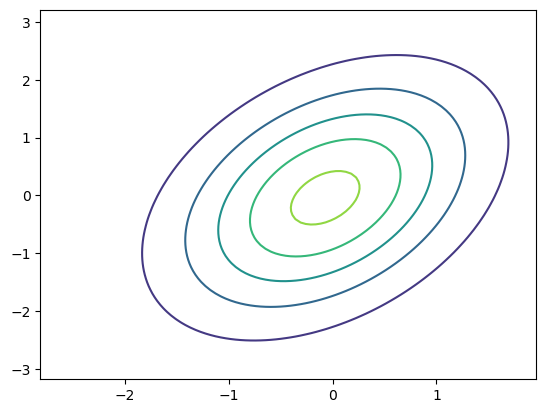

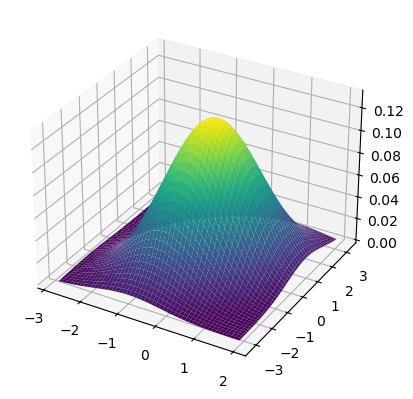

In [3]:
multivariate_normal(100)

/home/malick/Desktop/cs-courses/03-cs3A/10-statistical-models-2-s9/03-code/gp.py:32: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  y = np.random.multivariate_normal(mean=mean, cov=cov, size=num_samples)


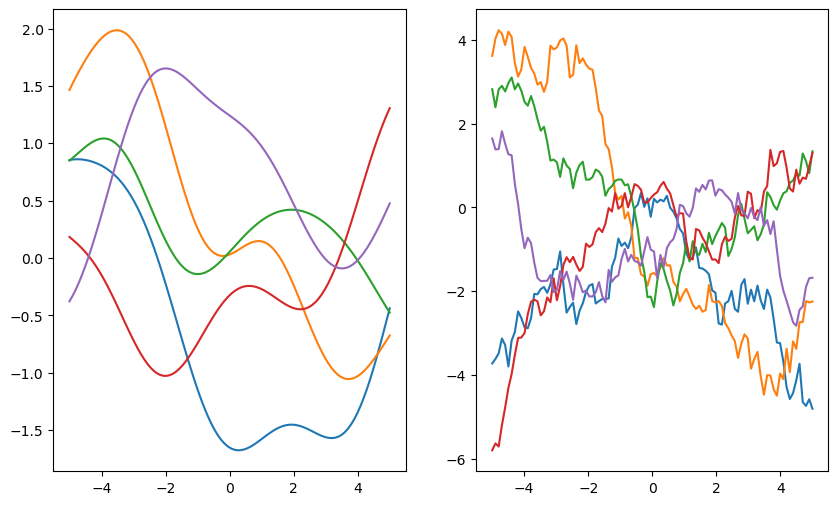

In [4]:
fig, axes = plt.subplots(1,2, figsize=(10,6))
axes = axes.ravel()
cov_functions = [gp.squared_exp(sigma=1, l=2), gp.brownian()]
for i, func in enumerate(cov_functions):
    gaussian_process = gp.GaussianProcess(
        mu=lambda x: 0., k=func
    )
    gaussian_process.represent_prior(ax=axes[i])
plt.show()

In [5]:
target = lambda x : x ** 2 * np.exp(- np.abs(x)/3.)
f = np.vectorize(target)

def gaussian_process_regression(num_observations, ax, noise_data=0):
    Xo = np.random.uniform(-5,5,num_observations)
    Yo = f(Xo) + np.random.normal(0., noise_data, Xo.shape[0])
    Xp = np.linspace(-5,5,100)

    gaussian_process = gp.GaussianProcess(
        mu=lambda x: 1.,
        k=gp.squared_exp(sigma=1, l=2),
    )

    num_samples = 5
    mu, cov = gaussian_process.get_posterior(Xp=Xp, Xo=Xo, Yo=Yo)
    y = np.random.multivariate_normal(mean=mu, cov=cov, size=num_samples)
    for i in range(num_samples):
        ax.plot(Xp, y[i,:])
    ax.plot(Xo, Yo, 'x', markeredgecolor='r',  markeredgewidth=2, markersize=10)


/tmp/ipykernel_6240/2816971891.py:17: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  y = np.random.multivariate_normal(mean=mu, cov=cov, size=num_samples)


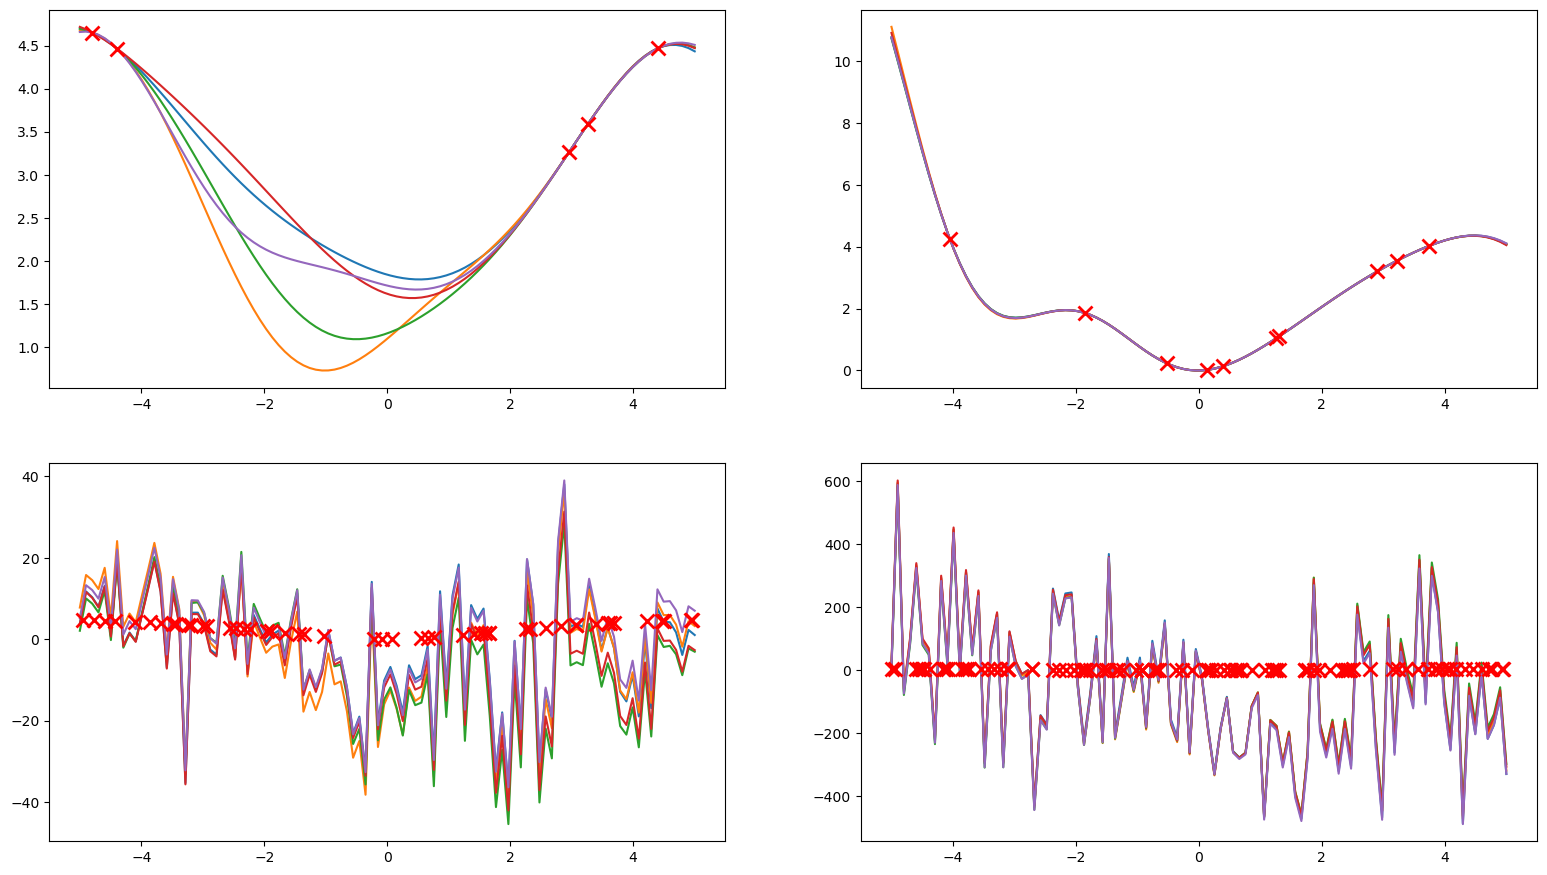

In [6]:
fig, axes = plt.subplots(2,2,figsize=(19.2,10.8))
axes = axes.ravel()
for i, n in enumerate([5, 10, 50, 100]):
    gaussian_process_regression(num_observations=n, ax=axes[i])
plt.show()

Gaussian Process regression becomes unstable with 100 observations due to numerical issues in the covariance matrix inversion.

In [10]:
target = lambda x : x ** 2 * np.exp(- np.abs(x)/3.)
f = np.vectorize(target)

def gaussian_process_regression_white_noise(num_observations, ax, noise_data=0, white_noise=0.1):
    Xo = np.random.uniform(-5,5,num_observations)
    Yo = f(Xo) + np.random.normal(0., noise_data, Xo.shape[0])
    Xp = np.linspace(-5,5,100)

    white_noise_cov_func = lambda x,y: white_noise**2 if np.abs(x-y)<1e-8 else 0.

    gaussian_process = gp.GaussianProcess(
        mu=lambda x: 1.,
        k=lambda x,y: gp.squared_exp(sigma=1, l=2)(x,y) + white_noise_cov_func(x,y)
    )

    num_samples = 5
    mu, cov = gaussian_process.get_posterior(Xp=Xp, Xo=Xo, Yo=Yo)
    y = np.random.multivariate_normal(mean=mu, cov=cov, size=num_samples)
    for i in range(num_samples):
        ax.plot(Xp, y[i,:])
    ax.plot(Xo, Yo, 'x', markeredgecolor='r',  markeredgewidth=2, markersize=10)


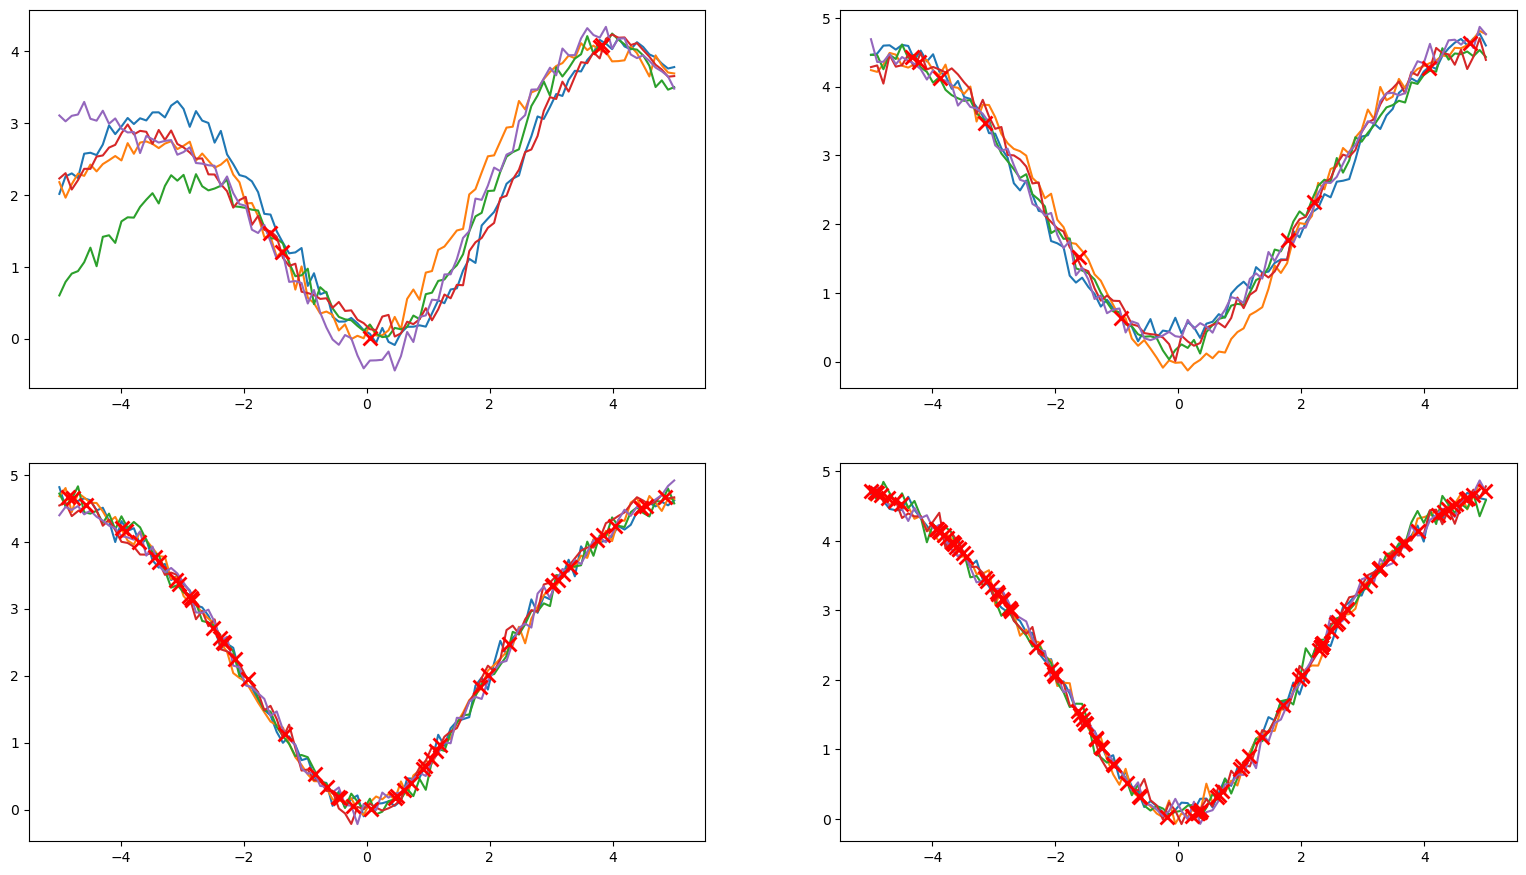

In [15]:
fig, axes = plt.subplots(2,2,figsize=(19.2,10.8))
axes = axes.ravel()
for i, n in enumerate([5, 10, 50, 100]):
    gaussian_process_regression_white_noise(num_observations=n, ax=axes[i], white_noise=0.1)
plt.show()

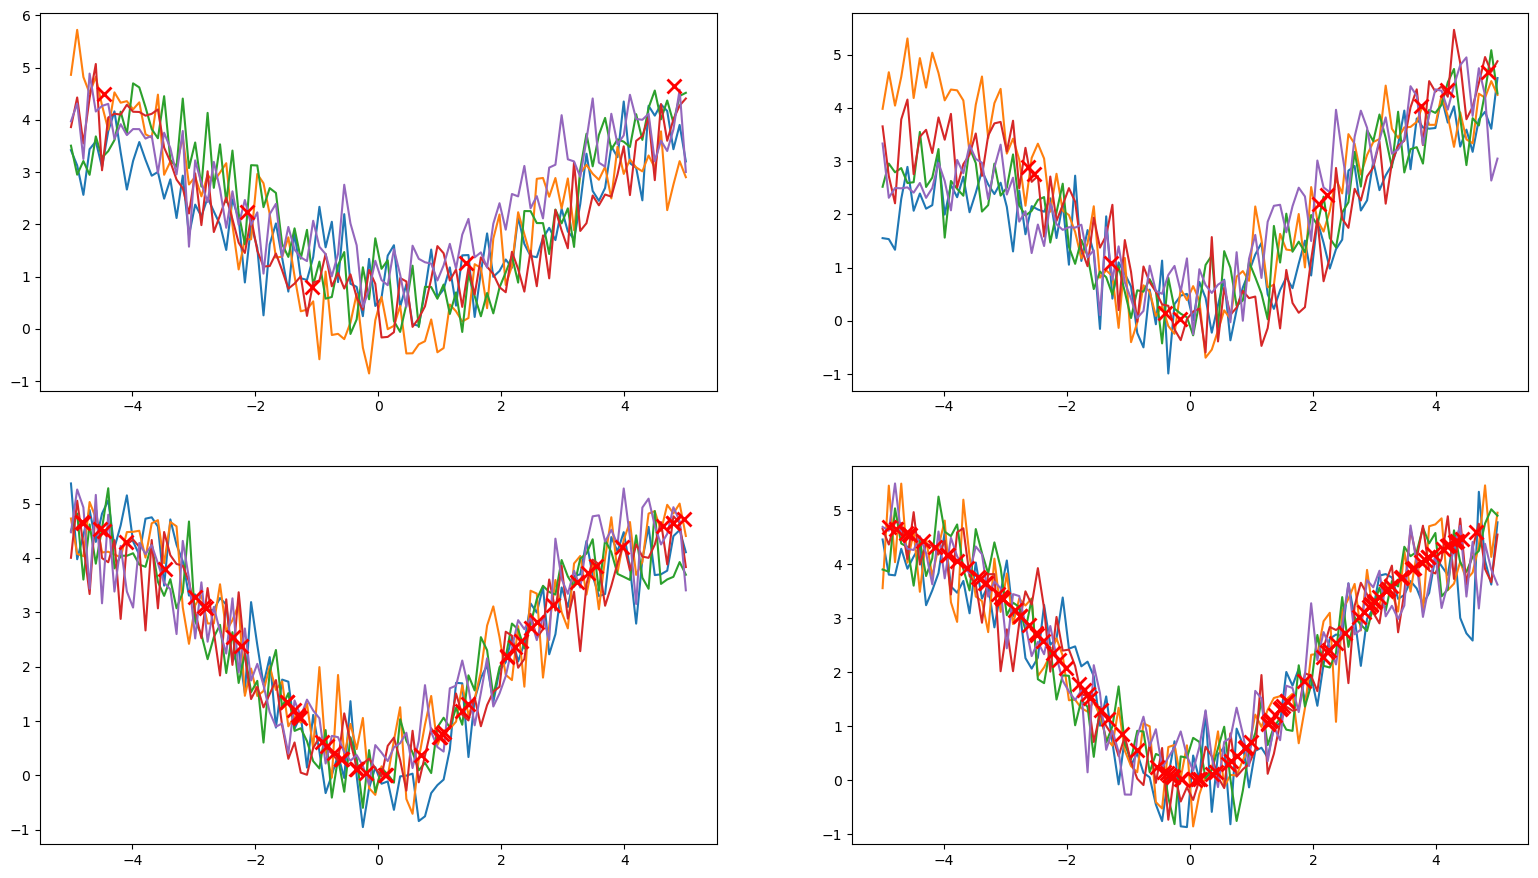

In [19]:
fig, axes = plt.subplots(2,2,figsize=(19.2,10.8))
axes = axes.ravel()
for i, n in enumerate([5, 10, 50, 100]):
    gaussian_process_regression_white_noise(num_observations=n, ax=axes[i], white_noise=0.5)
plt.show()